### <font color=red>CHANGE PLOTS TO SEABORN-STYLED PLOTS!</font>

# Large Population: Neutral *vs* High Selection


The parameters are summarized in the table below:

Parameter  | Neutral | Selection  |
-----------|---------|------------|
Final size | $10^8$  |   $10^8$   |
q (start)  |$10^{-3}$| $10^{-3}$  |
q-factor   | $1$   |   $1$    |  
P(death)   | $0.3$   |   $0.3$    |
**Selection**  | 0   |  **6**   |  

In [1]:
from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

%matplotlib inline
#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

#  Simulations

## High selection

In [2]:
%%time
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**8
q = 10**(-3)
qfac = 1
alpha = 0.3
sel = 6
highSel = Population(l, q, mutfactor=qfac, death_frac=alpha, selection=sel)
highSel.simulate()
print("Total population size:", highSel.size)
print("Generations:", highSel.gen)
print()
print("Start clone size:", highSel.start_clone.size)
print("Number of subclones:", len(highSel.clones[1:]))

Total population size: 116402657
Generations: 35

Start clone size: 129
Number of subclones: 166823
CPU times: user 7.59 s, sys: 205 ms, total: 7.8 s
Wall time: 8.03 s


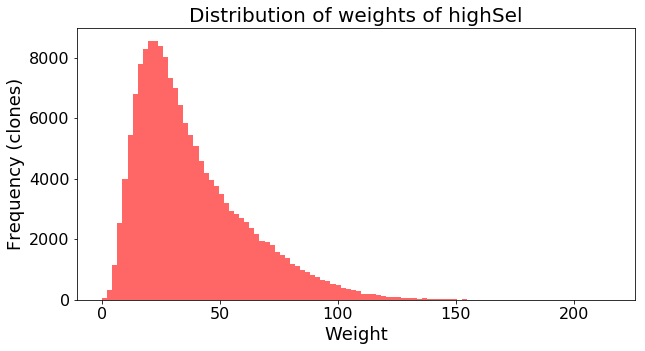

In [3]:
# Check weights of clones for population with selection
weights = []
for clone in highSel.clones:
    weights.append(clone.weight)

plt.figure(figsize=(10,5))
plt.hist(weights, bins=100, color='r', alpha=0.6)
plt.title("Distribution of weights of highSel")
plt.xlabel("Weight")
plt.ylabel("Frequency (clones)")
plt.show()

### *Final_data*

In [4]:
highSel_data = final_data(highSel)
highSel_data.head()

,Birthday,q,Final size,Family size,Allele frequency,Mutations,Children,Weight,RGB color
Clone ID,,,,,,,,,
A,0,0.001,129,116402657,1.0,0,25,1.000000,"(0, 0, 0)"
A.0,7,0.001,0,0,0.0,1,0,0.618938,"(73, 32, 174)"
A.1,14,0.001,0,0,0.0,1,0,0.002213,"(98, 3, 139)"
A.2,14,0.001,0,0,0.0,1,0,0.357297,"(6, 9, 87)"
A.3,15,0.001,0,0,0.0,1,0,0.005313,"(46, 15, 59)"


**ALL ANALYSES** are carried out with the detection limit defined below, unless otherwise stated.

In [5]:
detection_limit = 100

## Evolution of clone family sizes for Large Population with High Selection

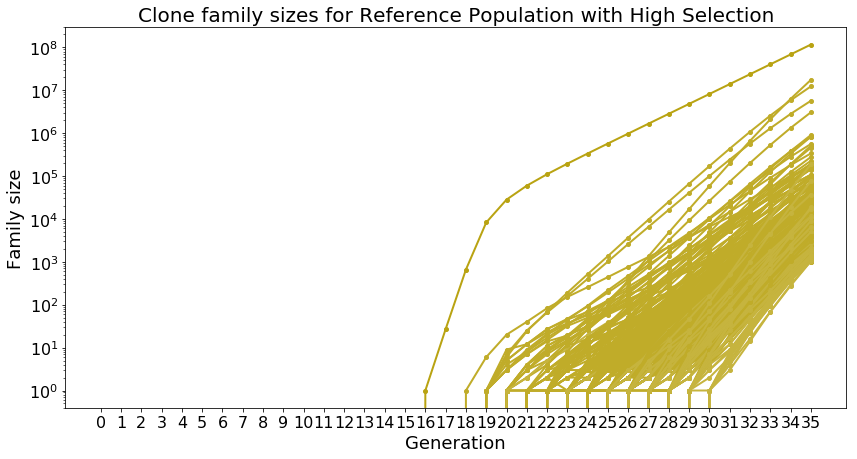

In [6]:
highSel_fam_size_plot = family_size_plots(highSel, det_lim=1000);
plt.title("Clone family sizes for Reference Population with High Selection");
#plt.legend();
plt.savefig("./Figures/Large-High_Selection/highSel-fam_size_evo.png");
plt.show()

## Evolution of Start clone size for High Selection

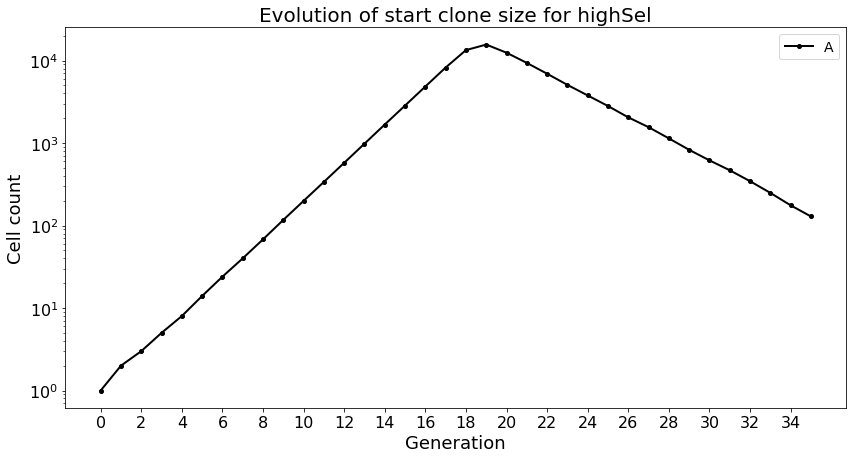

In [7]:
# evolution of start clone size for highSel
plt.figure()
plt.plot(highSel.start_clone.size_vec, marker='.', color='k', label=highSel.start_clone.ID);
plt.ylabel("Cell count");
plt.xlabel("Generation");
plt.title("Evolution of start clone size for highSel");
plt.legend();
plt.xticks(range(0, highSel.gen+1, 2));
plt.yscale('log');
plt.show()

## Phylo tree for Large Population with High Selection

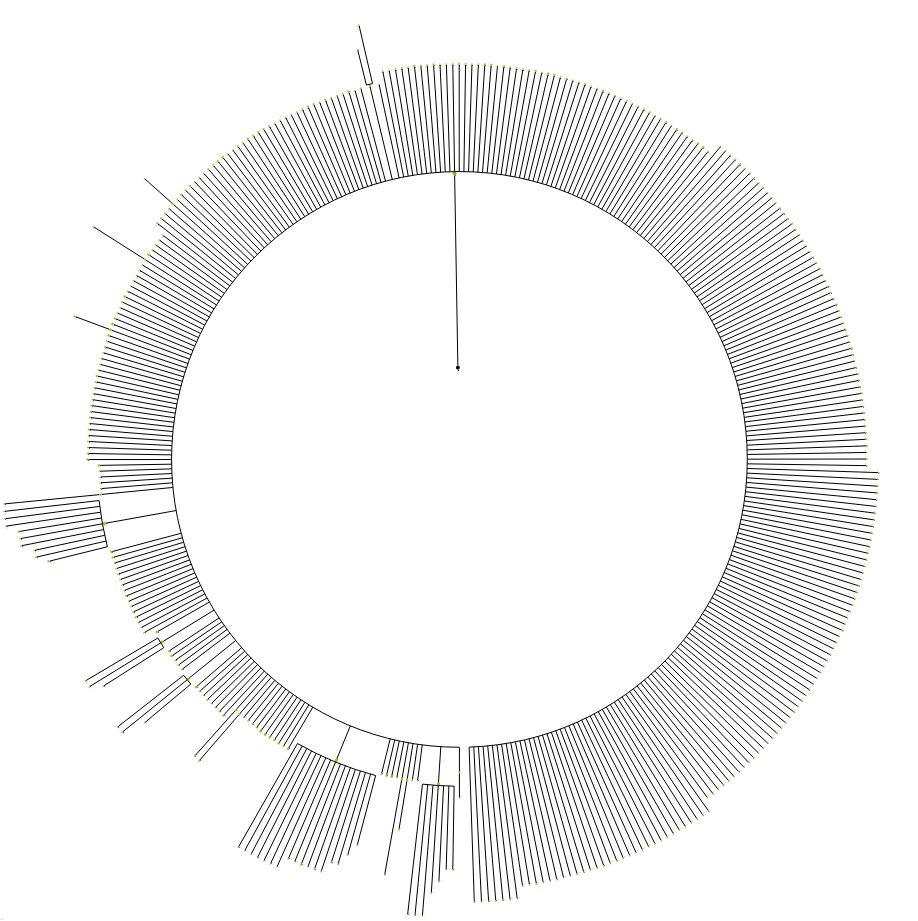

In [8]:
highSel_tree, highSel_ts = build_tree(highSel, det_lim=1000, log=True)
#print(highSel_tree)
highSel_ts.mode = 'c'
highSel_tree.render("./Figures/Large-High_Selection/highSel-tree.png", tree_style=highSel_ts, h=260, units='mm');
Image("./Figures/Large-High_Selection/highSel-tree.png")

## Allele frequency spectrum for Large Population with Selection

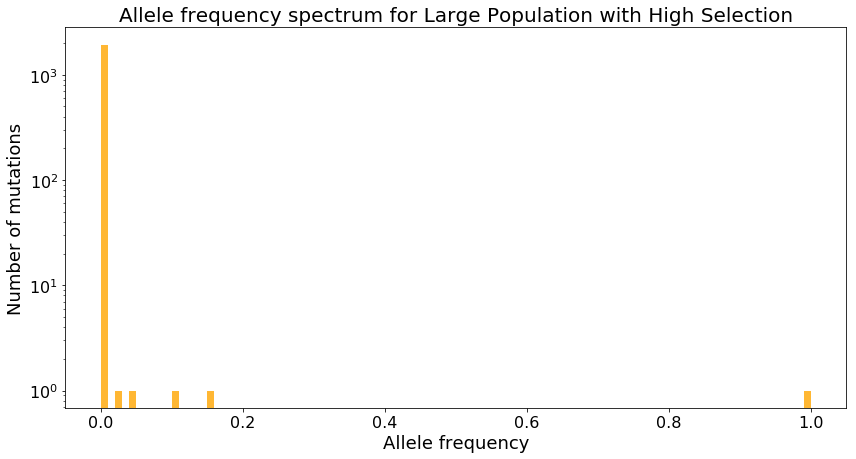

In [9]:
highSel_af = highSel_data.loc[highSel_data["Family size"] >= detection_limit]["Allele frequency"]
highSel_af.iloc[1:].plot(kind='hist', grid=False, logy=True, bins=100, color='orange', alpha=0.8);
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for Large Population with High Selection');
plt.savefig("./Figures/Large-High_Selection/highSel-AF_spec.png");
plt.show()

## Cumulative number of mutations in function of 1/f 


R^2 = 0.989099155517


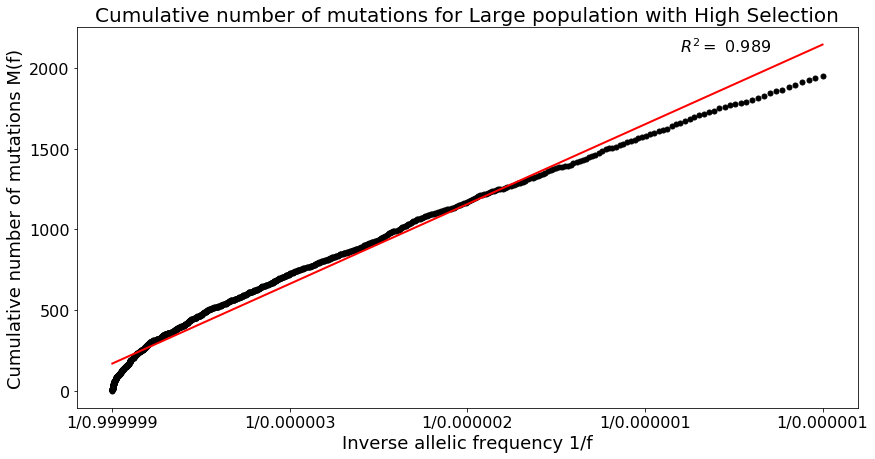

In [10]:
fit_highSel_af_r_value = fit_cumulative_mutations(highSel_data, det_lim=detection_limit, plot=True)
print("\nR^2 =", fit_highSel_af_r_value)
plt.title("Cumulative number of mutations for Large population with High Selection");
plt.savefig("./Figures/Large-High_Selection/highSel-Cum_num_M.png");
plt.show()

## Heterogeneity

In [11]:
highSel_h = heterogeneity(highSel_data, det_lim=1)
print(highSel_h)

0.631117520384


## Distribution of number of mutations per clone

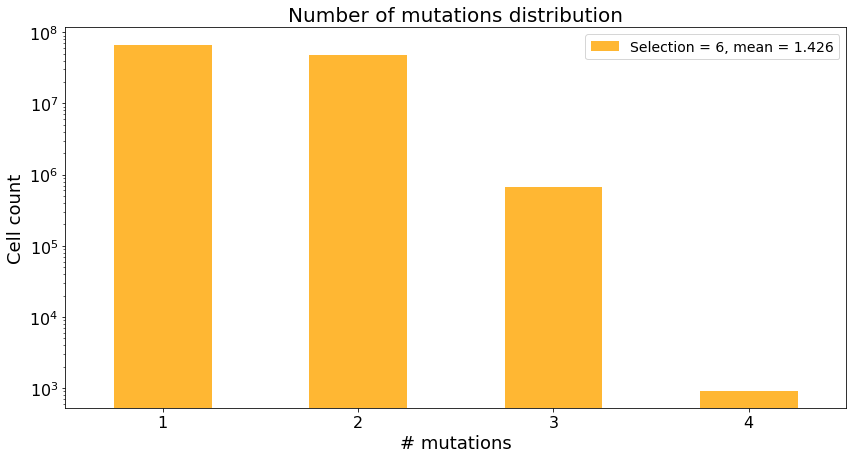

In [12]:
highSel_num_mut_df = num_mutations_distribution(highSel_data, det_lim=detection_limit)
highSel_avg_num_mut = avg_num_mutations(highSel_num_mut_df)
highSel_num_mut_df.columns = ["Selection = %s, mean = %s" %(sel, round(highSel_avg_num_mut, 3))]
highSel_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='orange', alpha=0.8);

plt.ylabel("Cell count");
plt.xlabel("Number of mutations");
plt.title("Number of mutations distribution");
plt.legend(frameon=True, fancybox=True, shadow=True);
plt.savefig("./Figures/Large-High_Selection/highSel-Num_mut.png");
plt.show()

## Reconstructing the mutational timeline for high Selection population

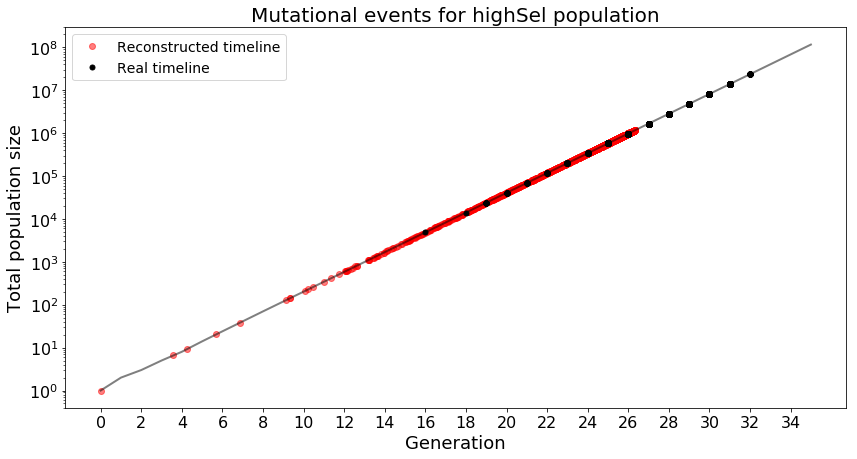

In [13]:
alpha = highSel.death_frac

highSel_mutations = highSel_data.loc[highSel_data['Family size'] >= 100].iloc[1:]
highSel_real_t = highSel_mutations["Birthday"].values
highSel_real_T = highSel_real_t*np.log(2-alpha_N)/np.log(2)
highSel_real_popsizes = list(highSel.size_vec[i] for i in highSel_real_t)

highSel_rec_T, highSel_rec_popsizes, highSel_rec_errors = reconstruct_mutational_timeline(highSel_data, alpha, det_lim=detection_limit)

plt.plot(highSel_real_T, highSel_real_popsizes, color='gray', alpha=0.7);
plt.plot(highSel_real_T, highSel_real_popsizes, marker='.', color='k', linestyle='none', label='Real timeline');
plt.plot(highSel_rec_T, highSel_rec_popsizes, marker='.', color='b', linestyle='none', label='Reconstructed timeline');

plt.xlabel('Number of population size doublings');
plt.ylabel('Total population size');
plt.title('Mutational events for highSel population (in dimensionless time)');
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True);
plt.yscale('log');
plt.savefig("./Figures/Large-High_Selection/highSel-Rec_mut_timeline.png");
plt.show()